In [1]:
import tensorflow as tf

In [2]:
x_=tf.placeholder(tf.float32,shape=(4,2),name="x_input")

In [3]:
x_inputs=[
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]

In [4]:
y_inputs=[
    [0],
    [1],
    [1],
    [0]
]

In [5]:
y_=tf.placeholder(tf.float32,shape=(4,1),name="y_input")

In [6]:
b1=tf.Variable(tf.zeros([2]),name="Bias_1")

In [7]:
b2=tf.Variable(tf.zeros([1]),name="Bias_2")

In [8]:
w1=tf.Variable(tf.random_uniform([2,2],-1,1),name="Weights_1")


In [9]:
w2=tf.Variable(tf.random_uniform([2,1],-1,1),name="Weights_2")

### Printing the initial setup values

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Printing x_inputs\n----------------------\n {}\n\n".format(sess.run(x_,feed_dict={x_:x_inputs})))
    print("Printing y_outputs (target output)\n---------------------------------\n {}\n\n".format(sess.run(y_,feed_dict={y_:y_inputs})))
    print("Printing b1 Values:\n--------------------\n {}\n\n".format(b1.eval()))
    print("Printing b2 Values:\n--------------------\n {}\n\n".format(b2.eval()))
    print("Printing w1 Values:\n--------------------\n {}\n\n".format(w1.eval()))
    print("Printing w2 Values:\n--------------------\n {}\n\n".format(w2.eval()))
    x1=x_inputs+b1
    print(x1.eval())

Printing x_inputs
----------------------
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


Printing y_outputs (target output)
---------------------------------
 [[0.]
 [1.]
 [1.]
 [0.]]


Printing b1 Values:
--------------------
 [0. 0.]


Printing b2 Values:
--------------------
 [0.]


Printing w1 Values:
--------------------
 [[-0.41208148  0.37853575]
 [ 0.8211913   0.25236917]]


Printing w2 Values:
--------------------
 [[ 0.8950572 ]
 [-0.66453004]]


[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


### Generating the predicted output

In [25]:
h34=(tf.matmul(x_,w1)+b1)

In [26]:
y_pred=tf.sigmoid(tf.matmul(h34,w2)+b2)

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Printing hidden layer values (H34):\n............................\n {}\n\n".format(sess.run(h34,feed_dict={x_:x_inputs})))
    print("Printing Y_Predicted:\n-----------------------------\n {}\n\n".format(sess.run(y_pred,feed_dict={x_:x_inputs})))
    

Printing hidden layer values (H34):
............................
 [[ 0.          0.        ]
 [-0.1858859   0.8132968 ]
 [ 0.78686833  0.84787583]
 [ 0.6009824   1.6611726 ]]


Printing Y_Predicted:
-----------------------------
 [[0.5       ]
 [0.71517885]
 [0.5677157 ]
 [0.76731443]]




### Define the Log loss or cross-entropy for updating the cost function 

In [28]:
cost=tf.reduce_mean((y_*tf.log(y_pred)+(1-y_)*tf.log(1.0-y_pred))*-1)
learning_rate=0.01
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
cost_cache=[]

In [29]:
with tf.Session() as sess:
    writer=tf.summary.FileWriter("./Downloads/XOR_logs_final",sess.graph_def)
    sess.run(tf.global_variables_initializer())
    print("Printing hidden layer values (H34):\n............................\n {}\n\n".format(sess.run(h34,feed_dict={x_:x_inputs})))
    print("Printing Y_Predicted (Before Training):\n-----------------------------\n {}\n\n".format(sess.run(y_pred,feed_dict={x_:x_inputs})))
    print("Cost Function (Initial):\n--------------------\n{} \n\n".format(sess.run(cost,feed_dict={x_:x_inputs,y_:y_inputs})))
    
    #checking the cost function after each training step
    print("Training (Updating the cost function- minimizing):\n----------------------------------\n")
    for step in range(100000):
        #print(step,end=" ")
        _,loss_val,pred_y,weight_1,weight_2,bias_1,bias_2=\
            sess.run([training_step,cost,y_pred,w1,w2,b1,b2],feed_dict={x_:x_inputs,y_:y_inputs})
        cost_cache.append(loss_val)
        #print("Cost/Y_pred/Weight1/Weight2/Bias1/Bias2 (Updated @ step {}):\n{}:\n\n{}:\n\n{}:\n\n{}:\n\n{}:\n\n{}".\
              #format(step,loss_val,pred_y,weight_1,weight_2,bias_1,bias_2))
    print("\n\n")
    print("Final Y_prediction (After Training)\n------------------------\n {} \n\n".format(sess.run(y_pred,feed_dict={x_:x_inputs,y_:y_inputs})))
    

Printing hidden layer values (H34):
............................
 [[ 0.          0.        ]
 [-0.6213851   0.9008627 ]
 [ 0.01797199 -0.2733066 ]
 [-0.6034131   0.6275561 ]]


Printing Y_Predicted (Before Training):
-----------------------------
 [[0.5       ]
 [0.39187926]
 [0.53708917]
 [0.42781043]]


Cost Function (Initial):
--------------------
0.7024561762809753 


Training (Updating the cost function- minimizing):
----------------------------------




Final Y_prediction (After Training)
------------------------
 [[0.4999919 ]
 [0.49999774]
 [0.5000023 ]
 [0.50000805]] 




In [31]:
cost_cache[-1]*100

69.31471824645996

In [23]:
import matplotlib.pyplot as plt

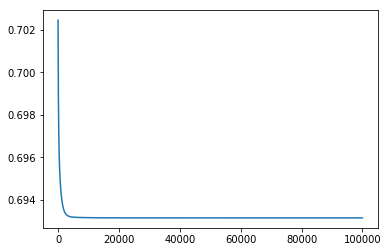

In [30]:
plt.plot(cost_cache)

In [16]:
import tensorboard


In [17]:
#%%cmd
#tensorboard --logdir=./Downloads/XOR_logs_final --host=127.0.0.1